<a href="https://colab.research.google.com/github/wow7seven/Flight-Price-Prediction/blob/main/FlightPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bp=pd.read_csv('/content/drive/MyDrive/Bonus_project-airline.csv')
bp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Preprocessing

## Basic

In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
bp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
bp=bp.dropna()
bp=bp.reset_index()

In [ ]:
bp=bp.drop(['index'],axis=1)

## Adding a column Weekday as in reality prices are higher during weekends so thought of adding one

In [ ]:
from datetime import date
weekday=[]
for i in bp['Date_of_Journey']:
  a = i.split("/")
  d  =int(a[0])
  m = int(a[1])
  y = int(a[2])
  weekday.append(date(y,m,d).weekday())
bp['Weekday']=weekday

## Converting Date of Journey into 2 separate columns of day and month( year is same for all)

In [ ]:
date=[]
month=[]
for i in bp['Date_of_Journey']:
  a=i.split('/')
  if (a[0][0]=='0'):
    date.append(int(a[0][1]))
  else:
    date.append(int(a[0]))
  month.append(int(a[1][1]))
bp['Date']=date
bp['Month']=month
bp=bp.drop(['Date_of_Journey'],axis=1)

In [ ]:
cols=bp.columns.tolist()
cols=cols[-3:]+cols[:-3]
bp=bp[cols]
bp

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,6,24,3,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,2,1,5,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,6,9,6,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,6,12,5,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,1,3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,5,27,4,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,5,27,4,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,4,1,3,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Converting Depature time and Arrival time in the form of military hours 17:30 is 1730 hours =1730 and duration to total time in minutes

In [ ]:
for i in range(len(bp['Dep_Time'])):
    s=bp['Dep_Time'][i]
    s=s[0]+s[1]+s[3]+s[4]
    bp['Dep_Time'][i]=int(s)

for i in range(len(bp['Arrival_Time'])):
    s=bp['Arrival_Time'][i]
    s=s[0]+s[1]+s[3]+s[4]
    bp['Arrival_Time'][i]=int(s)

bp['Arrival_Time']=bp['Arrival_Time'].astype(str).astype(int)
bp['Dep_Time']=bp['Dep_Time'].astype(str).astype(int)



bp['Duration']=bp['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
bp['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10677     150
10678     155
10679     180
10680     160
10681     500
Name: Duration, Length: 10682, dtype: int64

## Label Encoding Total Stops,Airline,Source,Destination,Additional Info and Route

### Total stops

In [ ]:
bp['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
bp['Total_Stops']=bp['Total_Stops'].replace([ 'non-stop','1 stop','2 stops','3 stops','4 stops'], [int(0),int(1),int(2),int(3),int(3)])
bp['Total_Stops']=bp['Total_Stops'].astype(str).astype(int)

### Rest

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bp['Airline']=le.fit_transform(bp['Airline'])
bp['Source']=le.fit_transform(bp['Source'])
bp['Destination']=le.fit_transform(bp['Airline'])
bp['Additional_Info']=le.fit_transform(bp['Additional_Info'])
bp['Route']=le.fit_transform(bp['Route'])

In [ ]:
bp

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,6,24,3,3,0,3,18,2220,110,170,0,8,3897
1,2,1,5,1,3,1,84,550,1315,445,2,8,7662
2,6,9,6,4,2,4,118,925,425,1140,2,8,13882
3,6,12,5,3,3,3,91,1805,2330,325,1,8,6218
4,4,1,3,3,0,3,29,1650,2135,285,1,8,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,0,3,0,64,1955,2225,150,0,8,4107
10678,5,27,4,1,3,1,64,2045,2320,155,0,8,4145
10679,5,27,4,4,0,4,18,820,1120,180,0,8,7229
10680,4,1,3,10,0,10,18,1130,1410,160,0,8,12648


# Visualization

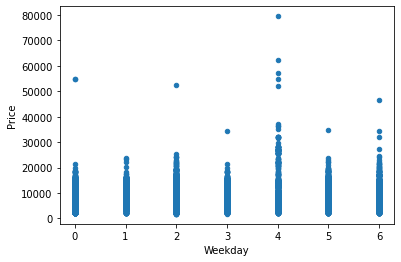

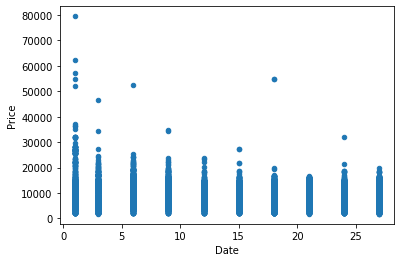

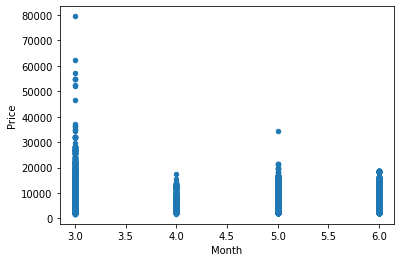

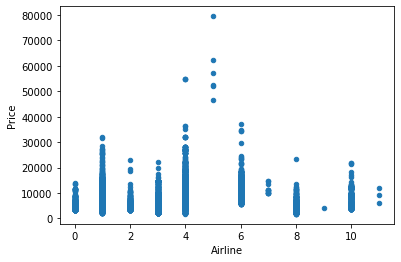

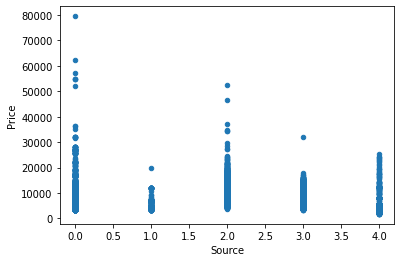

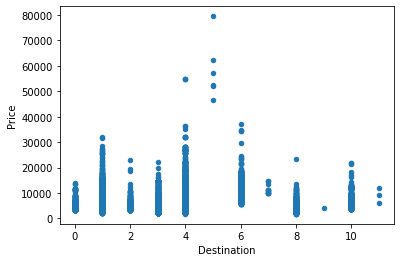

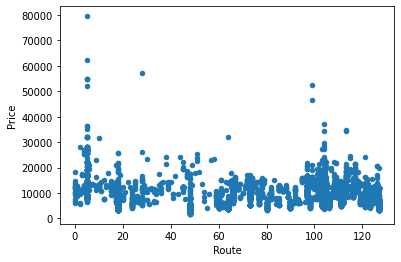

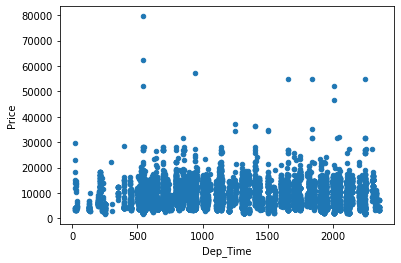

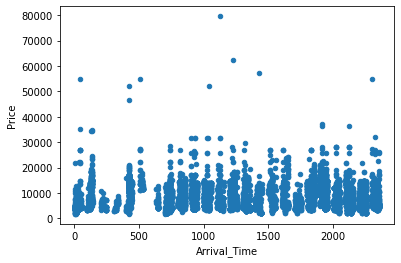

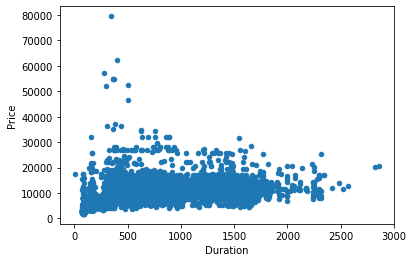

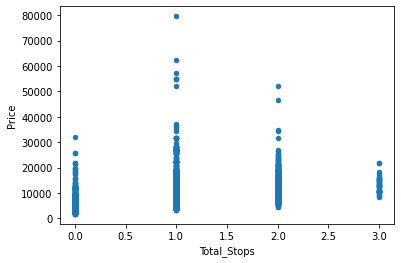

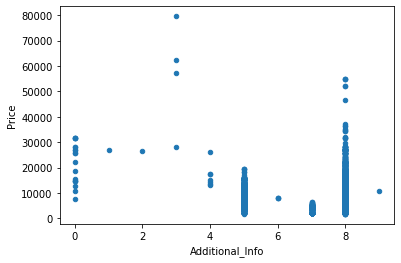

In [ ]:
cols=bp.columns
for i in range(len(cols)-1):
  bp.plot(cols[i], y='Price',kind='scatter')

# X and y

In [ ]:
X=bp.drop(['Price'],axis=1)
y=bp['Price']

In [ ]:
X

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,6,24,3,3,0,3,18,2220,110,170,0,8
1,2,1,5,1,3,1,84,550,1315,445,2,8
2,6,9,6,4,2,4,118,925,425,1140,2,8
3,6,12,5,3,3,3,91,1805,2330,325,1,8
4,4,1,3,3,0,3,29,1650,2135,285,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,0,3,0,64,1955,2225,150,0,8
10678,5,27,4,1,3,1,64,2045,2320,155,0,8
10679,5,27,4,4,0,4,18,820,1120,180,0,8
10680,4,1,3,10,0,10,18,1130,1410,160,0,8


## Scaling

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Min max scaling only Departure time,Arrival time and Duration

In [ ]:
X1=X.copy()
X1

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,6,24,3,3,0,3,18,2220,110,170,0,8
1,2,1,5,1,3,1,84,550,1315,445,2,8
2,6,9,6,4,2,4,118,925,425,1140,2,8
3,6,12,5,3,3,3,91,1805,2330,325,1,8
4,4,1,3,3,0,3,29,1650,2135,285,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,0,3,0,64,1955,2225,150,0,8
10678,5,27,4,1,3,1,64,2045,2320,155,0,8
10679,5,27,4,4,0,4,18,820,1120,180,0,8
10680,4,1,3,10,0,10,18,1130,1410,160,0,8


In [ ]:
max_dt=2359
min_dt=0000

max_at=2359
min_at=0000

max_d=X['Duration'].max()
min_d=X['Duration'].min()

In [ ]:
X1['Dep_Time'] = X1['Dep_Time'].astype(float)
X1['Arrival_Time'] = X1['Arrival_Time'].astype(float)
X1['Duration'] = X1['Duration'].astype(float)


In [ ]:
for i in range(len(X['Dep_Time'])):
  X1['Dep_Time'][i]= (max_dt-X['Dep_Time'][i])/2359

  X1['Arrival_Time'][i]= (max_at-X['Arrival_Time'][i])/2359

  X1['Duration'][i]= (max_d-X['Duration'][i])/(max_d-min_d)

## Printing all X

In [ ]:
X

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,6,24,3,3,0,3,18,2220,110,170,0,8
1,2,1,5,1,3,1,84,550,1315,445,2,8
2,6,9,6,4,2,4,118,925,425,1140,2,8
3,6,12,5,3,3,3,91,1805,2330,325,1,8
4,4,1,3,3,0,3,29,1650,2135,285,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,0,3,0,64,1955,2225,150,0,8
10678,5,27,4,1,3,1,64,2045,2320,155,0,8
10679,5,27,4,4,0,4,18,820,1120,180,0,8
10680,4,1,3,10,0,10,18,1130,1410,160,0,8


In [ ]:
X_scaled

array([[ 1.52747598,  1.23728754, -1.46740227, ..., -0.93149778,
        -1.22119865,  0.49992092],
       [-0.46604837, -1.47530729,  0.25028893, ..., -0.38995278,
         1.74252825,  0.49992092],
       [ 1.52747598, -0.53179604,  1.10913453, ...,  0.97867915,
         1.74252825,  0.49992092],
       ...,
       [ 1.02909489,  1.59110426, -0.60855667, ..., -0.91180524,
        -1.22119865,  0.49992092],
       [ 0.53071381, -1.47530729, -1.46740227, ..., -0.95119033,
        -1.22119865,  0.49992092],
       [ 0.03233272, -0.53179604,  0.25028893, ..., -0.28164378,
         1.74252825,  0.49992092]])

In [ ]:
X1

,Weekday,Date,Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,6,24,3,3,0,3,18,0.058923,0.953370,0.942207,0,8
1,2,1,5,1,3,1,84,0.766850,0.442560,0.845884,2,8
2,6,9,6,4,2,4,118,0.607885,0.819839,0.602452,2,8
3,6,12,5,3,3,3,91,0.234845,0.012293,0.887916,1,8
4,4,1,3,3,0,3,29,0.300551,0.094955,0.901926,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,9,4,0,3,0,64,0.171259,0.056804,0.949212,0,8
10678,5,27,4,1,3,1,64,0.133107,0.016532,0.947461,0,8
10679,5,27,4,4,0,4,18,0.652395,0.525223,0.938704,0,8
10680,4,1,3,10,0,10,18,0.520983,0.402289,0.945709,0,8


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.2,random_state=4)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2,random_state=4)

# Different models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score


dtr=DecisionTreeRegressor()
lr=LinearRegression()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
lgbm = LGBMRegressor()


## Decision Tree

In [ ]:
dtr.fit(X_train,y_train)
print("Train accuracy for X %")
print(dtr.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(dtr.score(X_test, y_test)*100)

Train accuracy for X %
99.60995758051358
Test accuracy for X %
81.57871737209729


In [ ]:
dtr.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(dtr.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X scaled %")
print(dtr.score(X_scaled_test, y_scaled_test)*100)

Train accuracy for X scaled %
99.60995758051358
Test accuracy for X scaled %
84.97938821331824


In [ ]:
dtr.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(dtr.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(dtr.score(X_test1, y_test1)*100)

Train accuracy for X1 %
99.60995758051358
Test accuracy for X1 %
81.63078280339332


## Linear Regressor

In [ ]:
lr.fit(X_train,y_train)
print("Train accuracy for X %")
print(lr.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(lr.score(X_test, y_test)*100)

Train accuracy for X %
43.74069921454614
Test accuracy for X %
43.72683323454216


In [ ]:
lr.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(lr.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X scaled %")
print(lr.score(X_scaled_test, y_scaled_test)*100)

Train accuracy for X scaled %
43.74069921454614
Test accuracy for X scaled %
43.726833234542184


In [ ]:
lr.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(lr.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(lr.score(X_test1, y_test1)*100)

Train accuracy for X1 %
43.74069921454614
Test accuracy for X1 %
43.72683323454217


## Random Forest

In [ ]:
rf.fit(X_train,y_train)
print("Train accuracy for X %")
print(rf.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(rf.score(X_test, y_test)*100)

Train accuracy for X %
98.02695943832894
Test accuracy for X %
90.82444620435237


In [ ]:
rf.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(rf.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X  scaled %")
print(rf.score(X_scaled_test, y_scaled_test)*100)

Train accuracy for X scaled %
97.83697081727307
Test accuracy for X  scaled %
90.83365875989831


In [ ]:
rf.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(rf.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(rf.score(X_test1, y_test1)*100)

Train accuracy for X1 %
97.818582577246
Test accuracy for X1 %
90.58562084804927


## Adaboost

In [ ]:
adb.fit(X_train,y_train)
print("Train accuracy for X %")
print(adb.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(adb.score(X_test, y_test)*100)

Train accuracy for X %
27.37031657556408
Test accuracy for X %
25.201134110168777


In [ ]:
adb.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(adb.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X scaled %")
print(adb.score(X_scaled_test, y_scaled_test)*100)

Train accuracy for X scaled %
20.856273737898313
Test accuracy for X scaled %
20.18109854151038


In [ ]:
adb.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(adb.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(adb.score(X_test1, y_test1)*100)

Train accuracy for X1 %
25.183611918629268
Test accuracy for X1 %
23.22579695260708


## LGBM

In [ ]:
lgbm.fit(X_train,y_train)
print("Train accuracy for X1 %")
print(lgbm.score(X_train, y_train)*100)
print("Test accuracy for X1 %")
print(lgbm.score(X_test, y_test)*100)

Train accuracy for X1 %
91.19751156124397
Test accuracy for X1 %
87.72958418909886


In [ ]:
lgbm.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(lgbm.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X scaled %")
print(lgbm.score(X_scaled_test, y_scaled_test)*100)

Train accuracy for X scaled %
91.31482891074846
Test accuracy for X scaled %
87.29602113617668


In [ ]:
lgbm.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(lgbm.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(lgbm.score(X_test1, y_test1)*100)

Train accuracy for X1 %
91.09862122393474
Test accuracy for X1 %
87.31160824341787


# Final Comparison

## Two models best that show the best result are Random forest and LGBM analyzing them futher

### Random Forest

In [ ]:
Train_accuracy=[]
Test_accuracy=[]
for i in range(1,11):
  max=0
  max_t=0
  for j in range(2,16):
    rf1=RandomForestRegressor(n_estimators=100*i,max_depth=j)
    rf1.fit(X_scaled_train,y_scaled_train)
    if(rf1.score(X_scaled_test, y_scaled_test)*100>max_t):
      max=(rf1.score(X_scaled_train, y_scaled_train)*100)
      max_t=(rf1.score(X_scaled_test, y_scaled_test)*100)
      j1=j
  print(i*100,j1,max)
  print(i*100,j1,max_t)
  Train_accuracy.append(max)
  Test_accuracy.append(max_t)
  print()

100 15 96.82941542976403
100 15 90.5019103287262

200 15 96.74554658844866
200 15 90.74503273590496

300 15 96.86368622724922
300 15 90.76103969154697

400 15 96.82470647115754
400 15 90.61938631885815

500 15 96.82830992379785
500 15 90.54553250078379

600 15 96.88785879359388
600 15 90.44816045785035

700 15 96.8371824582124
700 15 90.58939446715387

800 15 96.88208495858727
800 15 90.79970320760793

900 15 96.85418904292969
900 15 90.53900131019506

1000 15 96.8742543765874
1000 15 90.64284959371294



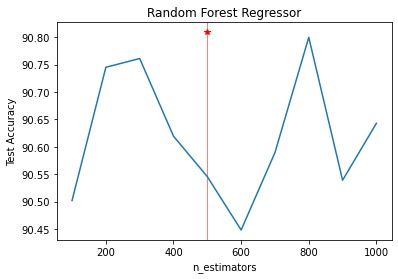

In [ ]:
plt.plot(range(100,1100,100),Test_accuracy)
plt.plot(100*np.argmax(Test_accuracy)+100,max(Test_accuracy),'r*')
plt.axvspan(100*np.argmax(Test_accuracy)+100-0.01,np.argmax(Test_accuracy)+0.01, color='red', alpha=0.5)
plt.title('Random Forest Regressor')
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

#### From above graph we can see n_estimators = 500 is best for random forest with max depth 15 running for all types of preproccessing we get

In [ ]:
rf1=RandomForestRegressor(n_estimators=500,max_depth=15)
rf1.fit(X_train,y_train)
print("Train accuracy for X %")
print(rf1.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(rf1.score(X_test, y_test)*100)

print()

rf1.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X scaled %")
print(rf1.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X scaled %")
print(rf1.score(X_scaled_test, y_scaled_test)*100)

print()

rf1.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(rf1.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(rf1.score(X_test1, y_test1)*100)



Train accuracy for X %
96.87241559733776
Test accuracy for X %
90.42537335225343

Train accuracy for X scaled %
96.88179300030669
Test accuracy for X scaled %
90.72714706181819

Train accuracy for X1 %
96.83736665732432
Test accuracy for X1 %
90.5243273742691


### LGBM

In [ ]:
Train_accuracy_l=[]
Test_accuracy_l=[]
for i in range(1,16):
  max=0
  max_t=0
  for j in range(2,8):
    for k in  range(1,30,2):
      lgbm1 = LGBMRegressor(n_estimators=i*100,learning_rate=k/100,max_depth=j)
      lgbm1.fit(X_train,y_train)
      if(lgbm1.score(X_test, y_test)*100>max_t):
        max=(lgbm1.score(X_train, y_train)*100)
        max_t=(lgbm1.score(X_test, y_test)*100)
        j1=j
        k1=k
  print(i*100,k1/100,j1,max)
  print(i*100,k1/100,j1,max_t)
  Train_accuracy_l.append(max)
  Test_accuracy_l.append(max_t)
  print()

100 0.27 7 94.00808830282793
100 0.27 7 89.37545851127943

200 0.27 7 96.08992390890675
200 0.27 7 90.80131524308545

300 0.29 7 97.29354287534218
300 0.29 7 91.53234266185409

400 0.29 7 97.86626915944291
400 0.29 7 91.81909436196611

500 0.27 7 98.06153724650144
500 0.27 7 91.99366977004782

600 0.27 7 98.36961770955692
600 0.27 7 92.12952282899144

700 0.27 7 98.57904112476152
700 0.27 7 92.2557261530619

800 0.27 7 98.73967272974367
800 0.27 7 92.2629128061887

900 0.25 5 97.66509563043155
900 0.25 5 92.28484752487194

1000 0.25 5 97.84689535599865
1000 0.25 5 92.35593747824495

1100 0.21 7 98.81372377338666
1100 0.21 7 92.33105402121699

1200 0.25 5 98.15245865932637
1200 0.25 5 92.36982635977266

1300 0.15 7 98.61351209092587
1300 0.15 7 92.36386236439537

1400 0.25 5 98.389088766471
1400 0.25 5 92.38854923596624

1500 0.25 5 98.4826524394263
1500 0.25 5 92.3798725291991



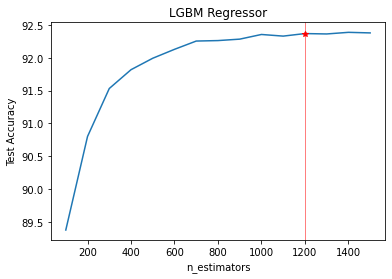

In [ ]:
plt.plot(range(100,1600,100),Test_accuracy_l)
plt.plot(100*np.argmax(Test_accuracy_l)+100,92.3698,'r*')
plt.axvspan(100*np.argmax(Test_accuracy_l)+100*np.argmax(Test_accuracy)+100-0.01,1200+0.01, color='red', alpha=0.5)
plt.title('LGBM Regressor')
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

#### From the above data we can compute n_estimators=1200,learning_rate=0.25,max_depth=5 is the best for LGBM although

In [ ]:
lgbm1 = LGBMRegressor(n_estimators=1200,learning_rate=0.25,max_depth=5)
lgbm1.fit(X_train,y_train)
print("Train accuracy for X %")
print(lgbm1.score(X_train, y_train)*100)
print("Test accuracy for X %")
print(lgbm1.score(X_test, y_test)*100)

print()

lgbm1.fit(X_scaled_train,y_scaled_train)
print("Train accuracy for X1 %")
print(lgbm1.score(X_scaled_train, y_scaled_train)*100)
print("Test accuracy for X1 %")
print(lgbm1.score(X_scaled_test, y_scaled_test)*100)

print()

lgbm1.fit(X_train1,y_train1)
print("Train accuracy for X1 %")
print(lgbm1.score(X_train1, y_train1)*100)
print("Test accuracy for X1 %")
print(lgbm1.score(X_test1, y_test1)*100)

Train accuracy for X %
98.15245865932637
Test accuracy for X %
92.36982635977266

Train accuracy for X1 %
98.11115537762166
Test accuracy for X1 %
92.05438862641249

Train accuracy for X1 %
98.1686859022238
Test accuracy for X1 %
91.68774223350593


# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [ ]:
class Pl(BaseEstimator,TransformerMixin):
  def __init__(self):
    print('called init')
    print()

  def fit(self,X_wp,y=None):
    print('called fit')
    print()
    return self

  def transform(self,X_wp,y=None):
    print('called transform')
    print()
    X=X_wp.copy()

    from datetime import date
    weekday=[]
    for i in X['Date_of_Journey']:
      a = i.split("/")
      d  =int(a[0])                                                           # Add Weekday column
      m = int(a[1])
      y1 = int(a[2])
      weekday.append(date(y1,m,d).weekday())
    X['Weekday']=weekday

    date=[]
    month=[]
    for i in X['Date_of_Journey']:
      w=i.split('/')
      if (w[0][0]=='0'):
        date.append(int(w[0][1]))
      else:
        date.append(int(w[0]))
      month.append(int(w[1][1]))
    X['Date']=date                                                                # Converting Date of journey to Date and month
    X['Month']=month
    X=X.drop(['Date_of_Journey'],axis=1)

    cols=X.columns.tolist()
    cols=cols[-3:]+cols[:-3]                                                      # Repositioning the columns



    for i in range(len(X['Dep_Time'])):
        s=X['Dep_Time'].iloc[i]
        s=str(s)
        s=s.replace(':','')
        X['Dep_Time'].iloc[i]=int(s)
        X['Dep_Time']=X['Dep_Time'].tolist()

    for i in range(len(X['Arrival_Time'])):
        s=X['Arrival_Time'].iloc[i]
        s=str(s)
        s=s.split(' ')[0]
        s=s.replace(':','')
        X['Arrival_Time'].iloc[i]=int(s)
        X['Arrival_Time']=X['Arrival_Time'].tolist()
                                                              # Converting Dep and arrival time to military hours and duration in minuts
    X['Duration']=X['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
    for i in range(len(X['Duration'])):
      X['Duration'].iloc[i]=int(X['Duration'].iloc[i])
    X['Duration']=X['Duration'].tolist()

    X['Total_Stops']=X['Total_Stops'].replace([ 'non-stop','1 stop','2 stops','3 stops','4 stops'], [int(0),int(1),int(2),int(3),int(3)])
    X['Total_Stops']=X['Total_Stops'].astype(str).astype(int)



    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    X['Airline']=le.fit_transform(X['Airline'])
    X['Source']=le.fit_transform(X['Source'])
    X['Destination']=le.fit_transform(X['Airline'])                               # Label encoding
    X['Additional_Info']=le.fit_transform(X['Additional_Info'])
    X['Route']=le.fit_transform(X['Route'])



    return X

In [ ]:
pipe=Pipeline(steps=[('class',Pl()),('model',LGBMRegressor(n_estimators=1200,learning_rate=0.25,max_depth=5))])

called init



In [ ]:
run2pipe=pd.read_csv('/content/drive/MyDrive/Bonus_project-airline.csv')

In [ ]:
run2pipe=run2pipe.dropna()
run2pipe=run2pipe.reset_index()                                                         # Drop NA values
run2pipe=run2pipe.drop(['index'],axis=1)

In [ ]:
X_pipe=run2pipe.drop(['Price'],axis=1)
y_pipe=run2pipe['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_pipe_train, X_pipe_test, y_pipe_train, y_pipe_test = train_test_split(X_pipe, y_pipe, test_size=0.2,random_state=4)

In [ ]:
X_pipe_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
7723,SpiceJet,6/06/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included
5769,Jet Airways,21/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,In-flight meal not included
4544,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,08:10 25 Mar,11h,1 stop,No info
3617,Vistara,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,07:10,20:20,13h 10m,1 stop,No info
6558,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 02 Mar,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
6017,Air Asia,6/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
709,Vistara,15/06/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
8366,Air India,12/06/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,21:50,9h 50m,2 stops,No info


In [ ]:
pipe.fit(X_pipe_train,y_pipe_train)

called fit

called transform



Pipeline(steps=[('class', Pl()),
                ('model',
                 LGBMRegressor(learning_rate=0.25, max_depth=5,
                               n_estimators=1200))])

In [ ]:
y_pred=pipe.predict(X_pipe_test)
y_pred

called transform



array([10199.25220373, 10165.77809273, 10323.1892159 , ...,
       11778.92976836, 15092.63189649, 10802.22831276])

In [ ]:
r2_score(y_pred,y_pipe_test)

0.3019593381743344